# Распознавание рукописных цифр с использованием Сверточных нейронных сетей (Convolutional Neural Network (CNN))


> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Описание эксперимента

В этом эксперименте мы создадим модель сверточной нейронной сети[Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) используя [Tensorflow](https://www.tensorflow.org/) для распознавания рукописных цифр.

**Сверточная нейронная сеть** (CNN или ConvNet) — это алгоритм глубокого обучения, который может принимать входное изображение, присваивать параметры значимости (веса и смещения) различным аспектам/объектам на изображении и иметь возможность отличать один от другого.



## Импорт необходимых библиотек
- [tensorflow](https://www.tensorflow.org/) - для разработки и обучения моделей машинного обучения.
- [matplotlib](https://matplotlib.org/) - для построения графика данных.
- [seaborn](https://seaborn.pydata.org/index.html) - для построения матрицы коллизий.
- [numpy](https://numpy.org/) - для операций линейной алгебры.
- [pandas](https://pandas.pydata.org/) - для отображения данных обучения/тестирования в таблице.
- [math](https://docs.python.org/3/library/math.html) - для вычисления квадратных корней и т. д.
- [datetime](https://docs.python.org/3.8/library/datetime.html) -  для генерации имен папок журналов.


In [2]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.8.10
Tensorflow version: 2.13.0


## Настройка Tensorboard

Мы будем использовать  [Tensorboard](https://www.tensorflow.org/tensorboard) для отладки модели позже.

In [4]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [5]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Загрузка данных

Набор обучающих данных состоит из 60000 изображений 28x28px рукописных цифр от 0 до 9.

Тестовый набор данных состоит из 10000 изображений размером 28x28px.

In [6]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [7]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Сохраните параметры изображения в константы, которые мы будем использовать позже для изменения формы данных и обучения модели.


In [8]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Исследование данных

Вот как выглядит каждое изображение в наборе данных. Это матрица целых чисел 28x28 (от `0` до `255`). Каждое целое число представляет цвет пикселя.

In [9]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Эту матрицу чисел можно нарисовать следующим образом:

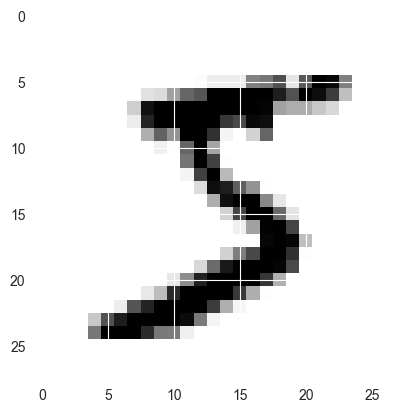

In [10]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Давайте напечатаем еще несколько обучающих примеров, чтобы понять, как пишутся цифры.

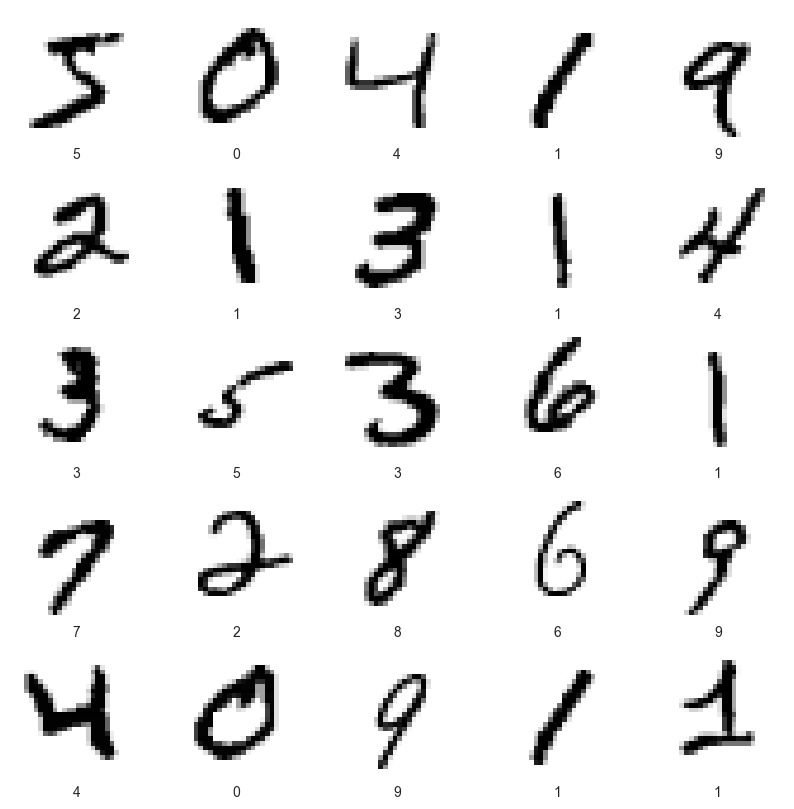

In [11]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Изменение формы данных

Чтобы использовать слои свертки, нам нужно изменить формат наших данных и добавить к ним цветовой канал. Сейчас каждая цифра имеет вид «(28, 28)», что означает, что это матрица 28x28 значений цвета от «0» до «255». Нам нужно изменить его форму на `(28, 28, 1)`, чтобы каждый пиксель потенциально мог иметь несколько каналов (например, красный, зеленый и синий).

In [12]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [13]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Нормализация данных

Прежде чем мы просто попытаемся перейти от диапазона значений `[0...255]` к `[0...1]`.

In [14]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

Проверим одну строку из 0-го изображения, чтобы увидеть значения цветового канала после нормализации.

In [15]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Построение модели

Мы будет строить последовательную [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras модель.

Модель будет состоять из двух сверточных слоев[Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) и двух слоев пулинга[MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable). Слой MaxPooling действует как своего рода субдискретизация с использованием максимальных значений в регионе вместо усреднения.

Потом мы добавим слой [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) для преобразования двумерного изображения в одномерный вектор.
Последний слой полносвязный [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) с 10 нейронами и функцией активации [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) на выходеs. Выходные данные представляют собой предположение сети для каждой цифры. 0-й выход представляет вероятность того, что входная цифра равна «0», 1-й выход представляет вероятность того, что входная цифра равна «1» и так далее...


In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Здесь можно увидеть описание параметров построенной модели.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

Для построения схемы модели инсталируем `graphviz`.


In [18]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Компиляция молели

In [38]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Обучение модели

In [20]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2117 - accuracy: 0.9353 - val_loss: 0.0603 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0417 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0335 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0327 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0290 - val_accuracy:

Посмотрим, как менялась функция потерь в процессе обучения. Мы ожидаем, что в каждую следующую эпоху значение будет становиться все меньше и меньше.

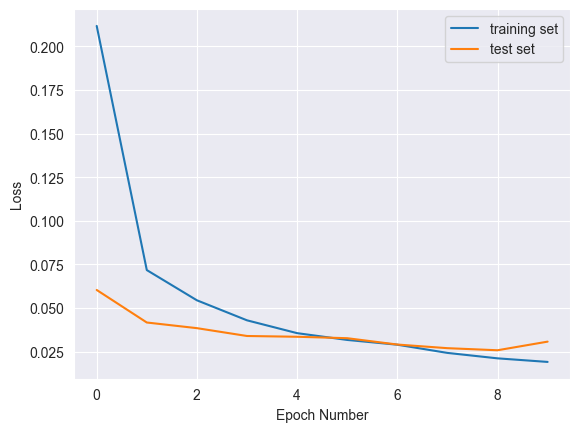

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

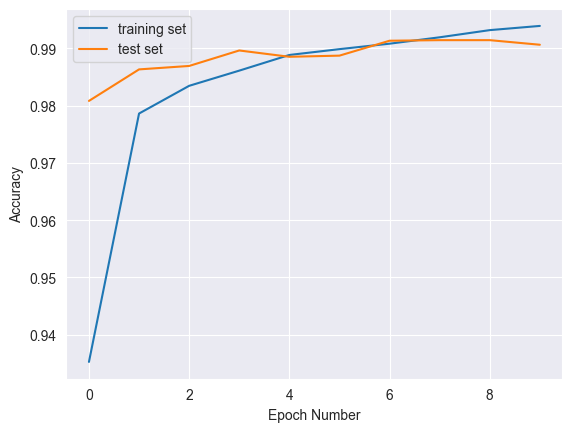

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Оценка точности модели

Нам нужно сравнить точность нашей модели на **training(обучающем)** наборе и **test(тестовом)** наборе. Мы ожидаем, что наша модель будет работать одинаково на обоих наборах. Если производительность на тестовом наборе будет плохой по сравнению с тренировочным набором, это будет для нас индикатором того, что модель переобучена, и у нас есть проблема с «большой дисперсией».

### Точность обучающей выборки

In [23]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [24]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.010473622940480709
Training accuracy:  0.9967166781425476


### Точность тестовой выборки

In [25]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [26]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03069821558892727
Validation accuracy:  0.9905999898910522


## Сохранение модели

Мы будем сохранять модель в`HDF5` файл.  `.h5` указывает на то, что модель должна быть сохранена в формате Keras как HDF5 файл. Чтобы использовать эту модель во front-end, мы преобразуем ее (позже в этой записной книжке) в понятный формат Javascript.(`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model).

In [27]:
model_name = 'digits_recognition_cnn.h5'
# model.save(model_name, save_format='h5')
model.save(model_name)

/Users/admin/Desktop/ComputerVisionLabs/.venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
loaded_model = tf.keras.models.load_model(model_name)

## Использование модели для предсказания

Чтобы использовать модель, которую мы только что обучили для распознавания цифр, нам нужно вызвать метод `predict()` .

In [29]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 0s 1ms/step


In [30]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Каждый прогноз состоит из 10 вероятностей (по одной на каждое число от 0 до 9). Нам нужно выбрать цифру с наибольшей вероятностью, так как это будет цифра, в которой наша модель наиболее уверена.

In [31]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.913536e-14,8.241788e-10,3.945965e-12,1.443565e-10,6.844095e-10,1.909772e-12,8.196324e-18,1.000000e+00,2.580293e-11,5.406471e-09
1,1.028318e-14,3.188207e-14,1.000000e+00,3.002590e-16,7.909372e-19,9.725864e-21,4.099061e-17,1.047148e-14,1.057210e-16,5.136404e-21
2,1.275703e-06,9.999700e-01,9.071274e-06,4.852496e-11,3.626356e-06,4.918190e-06,1.011077e-05,4.421258e-07,5.181253e-07,2.084406e-08
3,9.999986e-01,3.254132e-13,1.388453e-08,3.613033e-09,5.418467e-10,1.279967e-08,9.416647e-07,1.629363e-09,9.438539e-11,4.832191e-07
4,1.535177e-10,4.376072e-11,7.752883e-10,2.112520e-12,9.999341e-01,4.601318e-12,4.368352e-10,3.664973e-12,4.801452e-09,6.594402e-05
...,...,...,...,...,...,...,...,...,...,...
9995,6.611343e-14,3.614782e-09,1.000000e+00,1.268157e-10,7.967157e-17,1.323364e-17,1.973251e-17,5.849216e-08,8.038779e-13,2.548401e-16
9996,7.208394e-15,5.790499e-10,2.903147e-08,9.999998e-01,7.300396e-14,1.934467e-07,5.642156e-15,1.592757e-09,2.621182e-10,2.148584e-10
9997,9.840045e-16,2.570310e-08,2.445887e-10,6.504369e-16,1.000000e+00,2.649893e-12,7.937509e-12,6.713984e-10,3.755532e-09,3.232173e-08
9998,4.707873e-12,4.797359e-16,2.275505e-13,6.322450e-08,2.049599e-15,9.999927e-01,4.376425e-09,8.293275e-14,7.121082e-06,6.123486e-09


In [32]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


Итак, наша модель предсказывает, что первый пример из тестового набора равен 7.

In [33]:
print(predictions[0])

7


Давайте напечатаем первое изображение из тестового набора, чтобы убедиться, что прогноз модели верен.

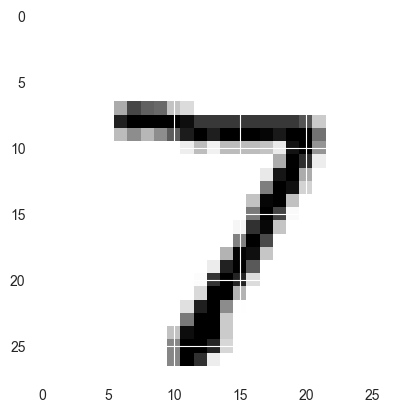

In [34]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

Мы видим, что наша модель сделала правильный прогноз и успешно распознала цифру «7». Давайте напечатаем еще несколько тестовых примеров и соответствующих прогнозов, чтобы увидеть, как модель работает и где она делает ошибки.

/var/folders/92/vvprtq3s2rlc5br8kx67vc9m0000gn/T/ipykernel_80655/1501165846.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


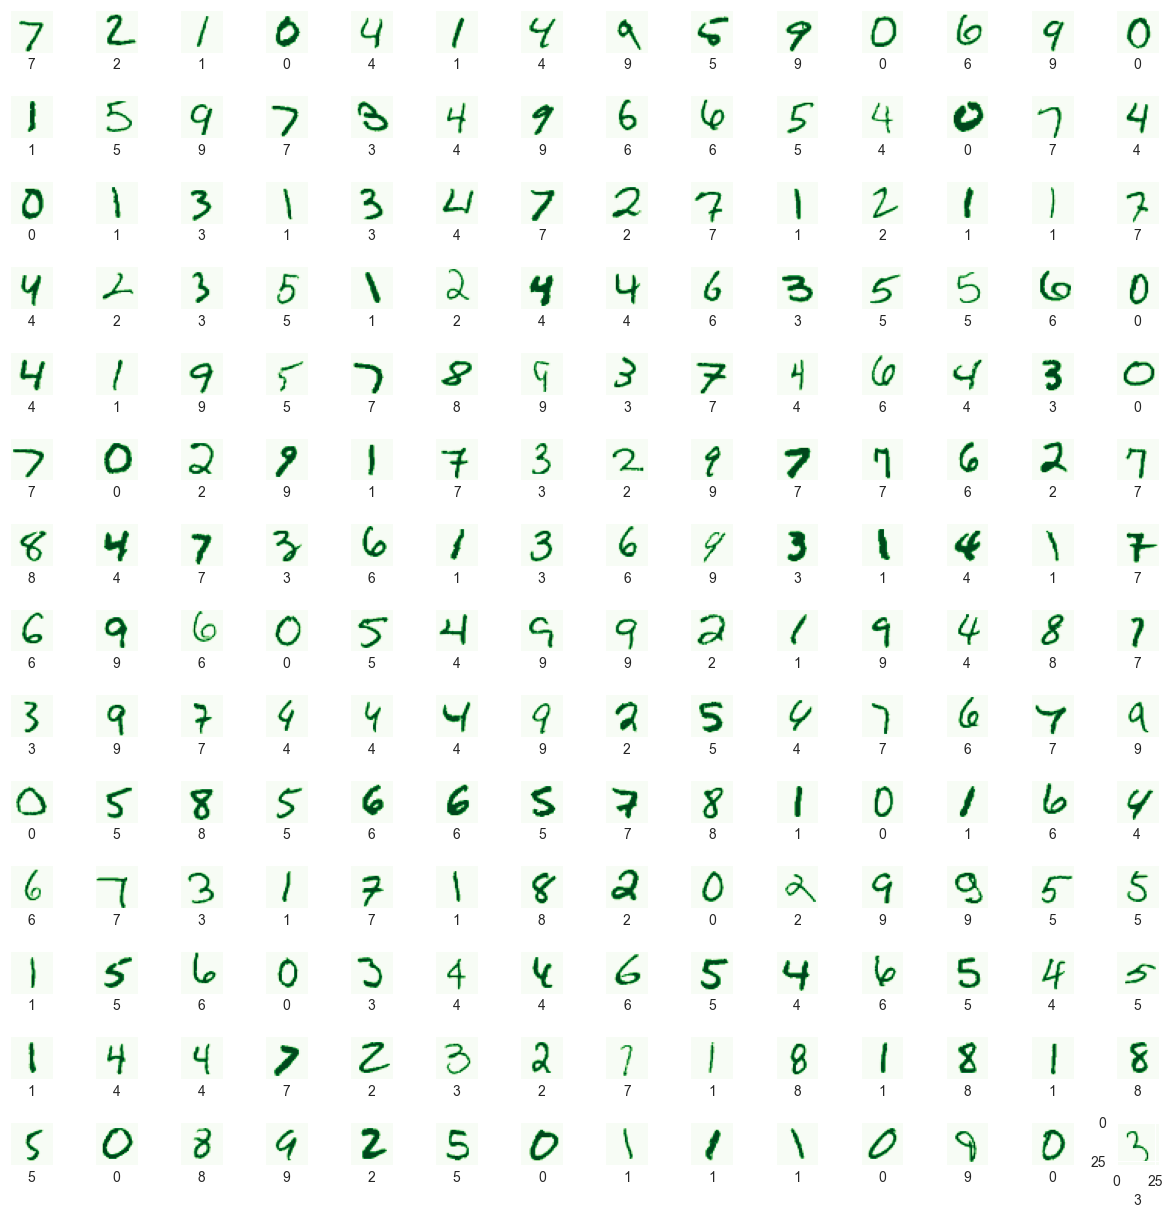

In [35]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Построение матрицы коллизий (confusion matrix)

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) показывает, какие числа хорошо распознаются моделью, а какие числа модель обычно путает, чтобы правильно распознать. Вы можете видеть, что модель работает очень хорошо, но иногда (28 раз из 10000) она может спутать число «5» с «3» или число «2» с «3».

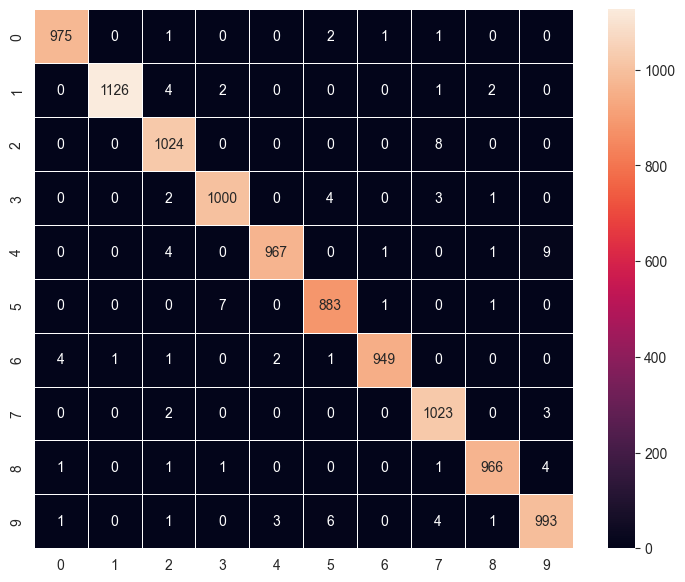

In [36]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Отладка модели сTensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) TensorBoard — это инструмент для обеспечения измерений и визуализации, необходимых в процессе машинного обучения. Он позволяет отслеживать метрики эксперимента, такие как потери и точность, визуализировать график модели, проецировать вложения в пространство меньшего размера и многое другое.

In [37]:
%tensorboard --logdir .logs/fit

Reusing TensorBoard on port 6006 (pid 79820), started 3:45:52 ago. (Use '!kill 79820' to kill it.)

# Задание 3

In [39]:
# Импорт необходимых библиотек
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.8.10
Tensorflow version: 2.13.0


### Настройка TensorBoard


In [40]:
%load_ext tensorboard
!rm -rf ./.logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Загрузка и подготовка данных MNIST

In [41]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Сохраним параметры изображения и добавим канал (CNN требует формат (W, H, Channels)).


In [42]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


### Преобразуем данные и нормализуем пиксели (из диапазона [0,255] в [0,1]).


In [43]:
x_train_with_channels = x_train.reshape(x_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
x_test_with_channels = x_test.reshape(x_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

x_train_normalized = x_train_with_channels / 255.0
x_test_normalized = x_test_with_channels / 255.0

print('x_train_with_channels:', x_train_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)

x_train_with_channels: (60000, 28, 28, 1)
x_test_with_channels: (10000, 28, 28, 1)


### Посмотрим на пример изображения:


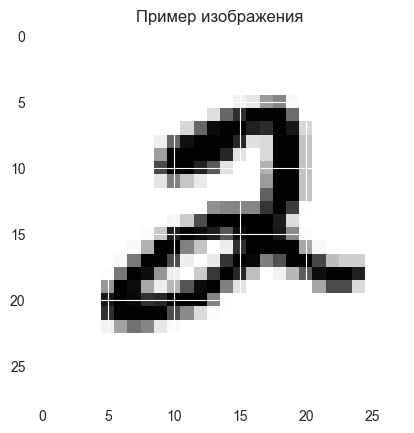

In [45]:
plt.imshow(x_train_normalized[5].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.title("Пример изображения")
plt.show()

### Функция для создания модели CNN 
### Функция **create_model** принимает параметр *num_conv_layers*.
### В данном эксперименте для оптимальной архитектуры выбирается вариант с двумя сверточными слоями:
### - Первый слой: kernel_size=7, filters=5, strides=2  
### - Второй слой: kernel_size=3, filters=10, strides=2  
### Далее модель преобразуется (Flatten), добавляется полносвязный слой, Dropout и выходной слой с softmax.


In [46]:
def create_model(num_conv_layers=2):
    model = tf.keras.models.Sequential()
    
    # Первый сверточный слой (обязательно)
    model.add(tf.keras.layers.Conv2D(
        filters=5, 
        kernel_size=7, 
        strides=2, 
        activation='relu',
        input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
        kernel_initializer=tf.keras.initializers.VarianceScaling()
    ))
    
    # Если требуется два сверточных слоя, добавляем второй
    if num_conv_layers == 2:
        model.add(tf.keras.layers.Conv2D(
            filters=10, 
            kernel_size=3, 
            strides=2, 
            activation='relu',
            kernel_initializer=tf.keras.initializers.VarianceScaling()
        ))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax',
                                    kernel_initializer=tf.keras.initializers.VarianceScaling()))
    return model

### Функция для компиляции и обучения модели


In [47]:
def train_model(model, optimizer, epochs=5, verbose=0):
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train_normalized, y_train,
        epochs=epochs,
        validation_data=(x_test_normalized, y_test),
        verbose=verbose
    )
    score = model.evaluate(x_test_normalized, y_test, verbose=0)
    return history, score

### Эксперимент по подбору оптимизатора 
### Варианты оптимизаторов (согласно заданию):
### 1. **Adam**  
### 2. **Adagrad**  
### 3. **RMSprop**  
### 4. **Adamax**  
### 5. **Nadam**  
### 6. **Ftrl**  
### Для каждого оптимизатора будем тестировать learning_rate = 0.1, 0.001, 0.0001.
### После экспериментов автоматически выбирается оптимизатор с наивысшей точностью.

In [49]:
def experiment_all_optimizers(optimizers_list, lr_values, num_epochs=5):
    results = {}
    for opt_name in optimizers_list:
        results[opt_name] = {}
        for lr in lr_values:
            if opt_name == 'Adam':
                opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
            elif opt_name == 'Adagrad':
                opt = tf.keras.optimizers.legacy.Adagrad(learning_rate=lr)
            elif opt_name == 'RMSprop':
                opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)
            elif opt_name == 'Adamax':
                opt = tf.keras.optimizers.legacy.Adamax(learning_rate=lr)
            elif opt_name == 'Nadam':
                opt = tf.keras.optimizers.legacy.Nadam(learning_rate=lr)
            elif opt_name == 'Ftrl':
                opt = tf.keras.optimizers.legacy.Ftrl(learning_rate=lr)
            else:
                raise ValueError("Неизвестный оптимизатор")
            
            # Создаем модель с оптимальной архитектурой (2 сверточных слоя)
            model = create_model(num_conv_layers=2)
            history, score = train_model(model, optimizer=opt, epochs=num_epochs, verbose=0)
            results[opt_name][lr] = score[1]  # score[1] – это accuracy
            print(f"Оптимизатор: {opt_name}, learning_rate: {lr} -> Accuracy: {score[1]:.4f}")
    return results

optimizers_list = ['Adam', 'Adagrad', 'RMSprop', 'Adamax', 'Nadam', 'Ftrl']
lr_values = [0.1, 0.001, 0.0001]

all_results = experiment_all_optimizers(optimizers_list, lr_values, num_epochs=5)

Оптимизатор: Adam, learning_rate: 0.1 -> Accuracy: 0.1010
Оптимизатор: Adam, learning_rate: 0.001 -> Accuracy: 0.9866
Оптимизатор: Adam, learning_rate: 0.0001 -> Accuracy: 0.9647
Оптимизатор: Adagrad, learning_rate: 0.1 -> Accuracy: 0.9868
Оптимизатор: Adagrad, learning_rate: 0.001 -> Accuracy: 0.9069
Оптимизатор: Adagrad, learning_rate: 0.0001 -> Accuracy: 0.2978
Оптимизатор: RMSprop, learning_rate: 0.1 -> Accuracy: 0.0982
Оптимизатор: RMSprop, learning_rate: 0.001 -> Accuracy: 0.9847
Оптимизатор: RMSprop, learning_rate: 0.0001 -> Accuracy: 0.9592
Оптимизатор: Adamax, learning_rate: 0.1 -> Accuracy: 0.9340
Оптимизатор: Adamax, learning_rate: 0.001 -> Accuracy: 0.9764
Оптимизатор: Adamax, learning_rate: 0.0001 -> Accuracy: 0.9288
Оптимизатор: Nadam, learning_rate: 0.1 -> Accuracy: 0.0982
Оптимизатор: Nadam, learning_rate: 0.001 -> Accuracy: 0.9850
Оптимизатор: Nadam, learning_rate: 0.0001 -> Accuracy: 0.9666
Оптимизатор: Ftrl, learning_rate: 0.1 -> Accuracy: 0.9833
Оптимизатор: Ftrl, l

#### Выбор лучшего оптимизатора


In [50]:
best_optimizer = None
best_lr = None
best_acc = 0

for opt_name in all_results:
    for lr, acc in all_results[opt_name].items():
        if acc > best_acc:
            best_acc = acc
            best_optimizer = opt_name
            best_lr = lr

print(f"\nЛучший оптимизатор: {best_optimizer} с learning_rate = {best_lr} и точностью {best_acc:.4f}")


Лучший оптимизатор: Adagrad с learning_rate = 0.1 и точностью 0.9868


### Финальное обучение модели с выбранным оптимизатором


In [52]:
# Создаем модель оптимальной архитектуры
final_model = create_model(num_conv_layers=2)

# Выбираем оптимизатор согласно результатам эксперимента
if best_optimizer == 'Adam':
    final_opt = tf.keras.optimizers.legacy.Adam(learning_rate=best_lr)
elif best_optimizer == 'Adagrad':
    final_opt = tf.keras.optimizers.legacy.Adagrad(learning_rate=best_lr)
elif best_optimizer == 'RMSprop':
    final_opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=best_lr)
elif best_optimizer == 'Adamax':
    final_opt = tf.keras.optimizers.legacy.Adamax(learning_rate=best_lr)
elif best_optimizer == 'Nadam':
    final_opt = tf.keras.optimizers.legacy.Nadam(learning_rate=best_lr)
elif best_optimizer == 'Ftrl':
    final_opt = tf.keras.optimizers.legacy.Ftrl(learning_rate=best_lr)
else:
    raise ValueError("Неизвестный оптимизатор")

# Компилируем и обучаем модель (например, на 10 эпох для финального результата)
final_model.compile(
    optimizer=final_opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
final_history = final_model.fit(
    x_train_normalized, y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1967 - accuracy: 0.9394 - val_loss: 0.0707 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9766 - val_loss: 0.0490 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0409 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0365 - val_accuracy:

### Сохранение финальной модели


In [53]:
final_model_name = 'optimal_digits_recognition_cnn.h5'
final_model.save(final_model_name)
print("Финальная модель сохранена в файле:", final_model_name)

Финальная модель сохранена в файле: optimal_digits_recognition_cnn.h5


/Users/admin/Desktop/ComputerVisionLabs/.venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Предсказание


313/313 [==============================] - 0s 981us/step
Предсказание для пятого тестового примера: 1


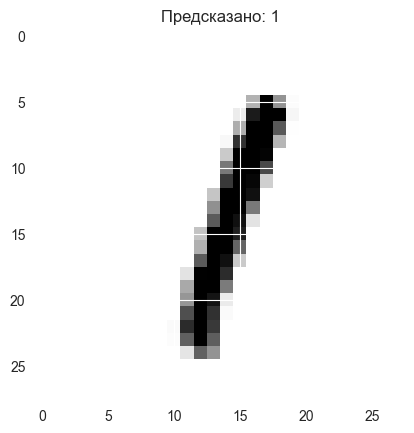

In [55]:
predictions_one_hot = final_model.predict(x_test_normalized)
predictions = np.argmax(predictions_one_hot, axis=1)
print("Предсказание для пятого тестового примера:", predictions[5])

plt.imshow(x_test_normalized[5].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.title("Предсказано: {}".format(predictions[5]))
plt.show()